In [1]:
#Let's start with importing necessary libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.datasets import load_boston
boston = load_boston()
dataset = pd.DataFrame(data= np.c_[boston['data'], boston['target']])
bos = pd.DataFrame(boston.data)
price = pd.DataFrame(boston.target)

### The Problem statement:
Each record in the database describes a Boston suburb or town. The goal is to build a linear reression model using Scikit Learn to predict the housing prices.

In [2]:
# adding column names
bos.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B 1000", "LSTAT"]
dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B 1000", "LSTAT", "MEDV"]
# first five rows from the dataset
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Following are out features:

1) CRIM per capita crime rate by town

2) ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS proportion of non-retail business acres per town

4) CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5) NOX nitric oxides concentration (parts per 10 million)

6) RM average number of rooms per dwelling

7) AGE proportion of owner-occupied units built prior to 1940

8) DIS weighted distances to five Boston employment centres

9) RAD index of accessibility to radial highways

10) TAX full-value property-tax rate per $10,000

11) PTRATIO pupil-teacher ratio by town

12) B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT % lower status of the population

Price being the target variable:

MEDV Median value of owner-occupied homes in $1000’s

### Exploratory Data Analysis

In [3]:
# dataset dimensions
bos.shape

(506, 13)

In [4]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B 1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# checking for null values
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B 1000     0
LSTAT      0
dtype: int64

In [6]:
# feature description
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Let's visualize our datasets

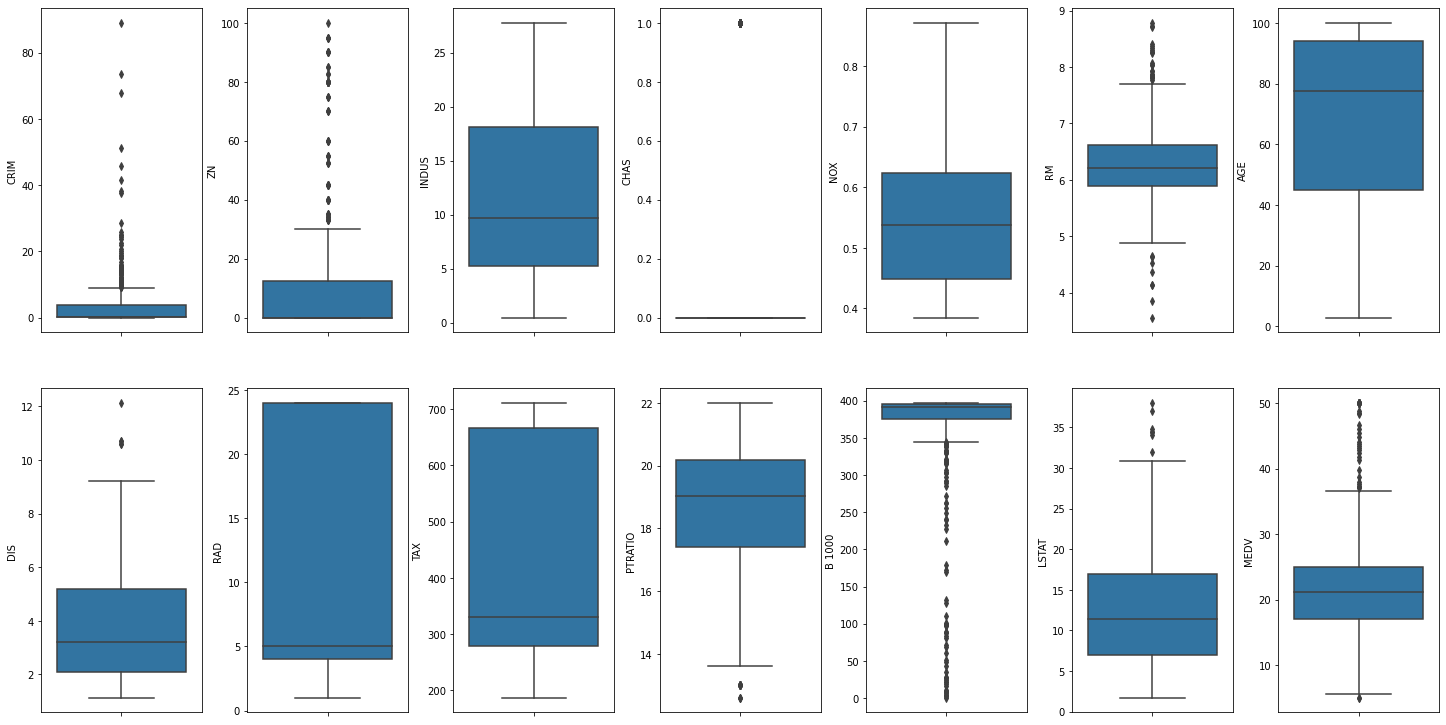

In [7]:
#boxplots of our dataset
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From the boxplot we can see many outliers. Now let's see how the distributions look like.

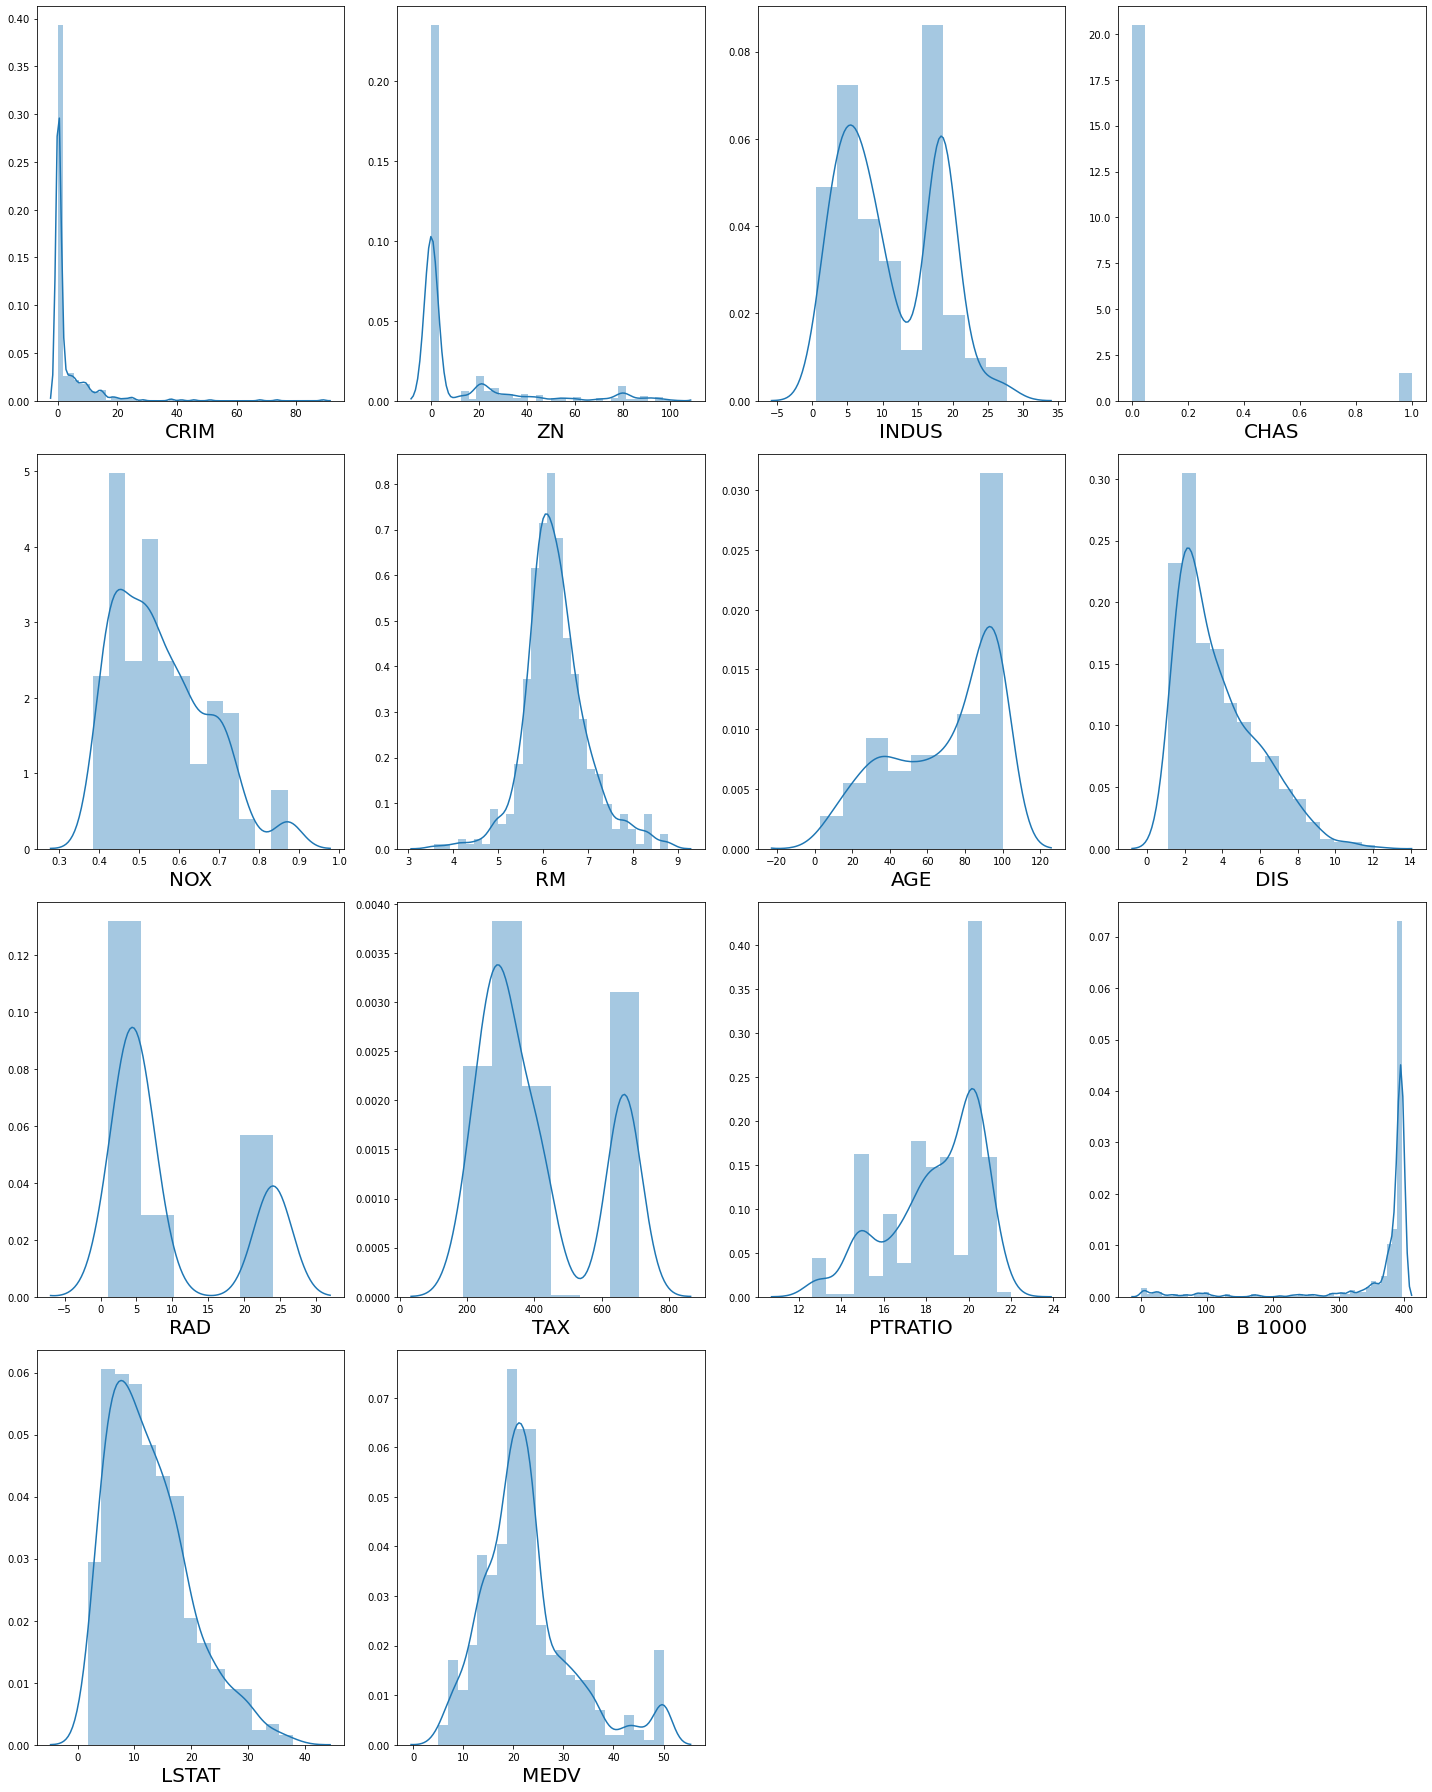

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From this we can see that CRIM, ZN, B 1000 have highly skewed distribution.
Now let's plot the correlation of the data.

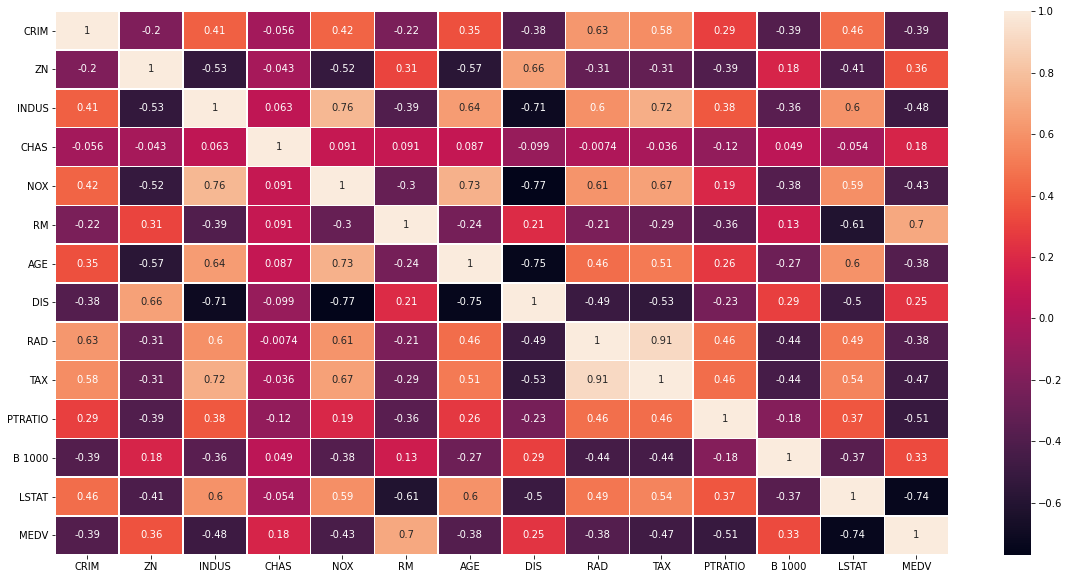

In [9]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)
plt.show()

We can see that RAD and TX are highly correlated with correlation greater than 0.9. Further we see that features like INDUS, NOX, RM, TAX, PTRATIO, LSTAT have a good correlation (>+-0.4) with our target variable price.

Let's check for multicollinearity.

In [10]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(bos)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = bos.columns

vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


We will be excluding TAX from our features due to its high relationship with other features.

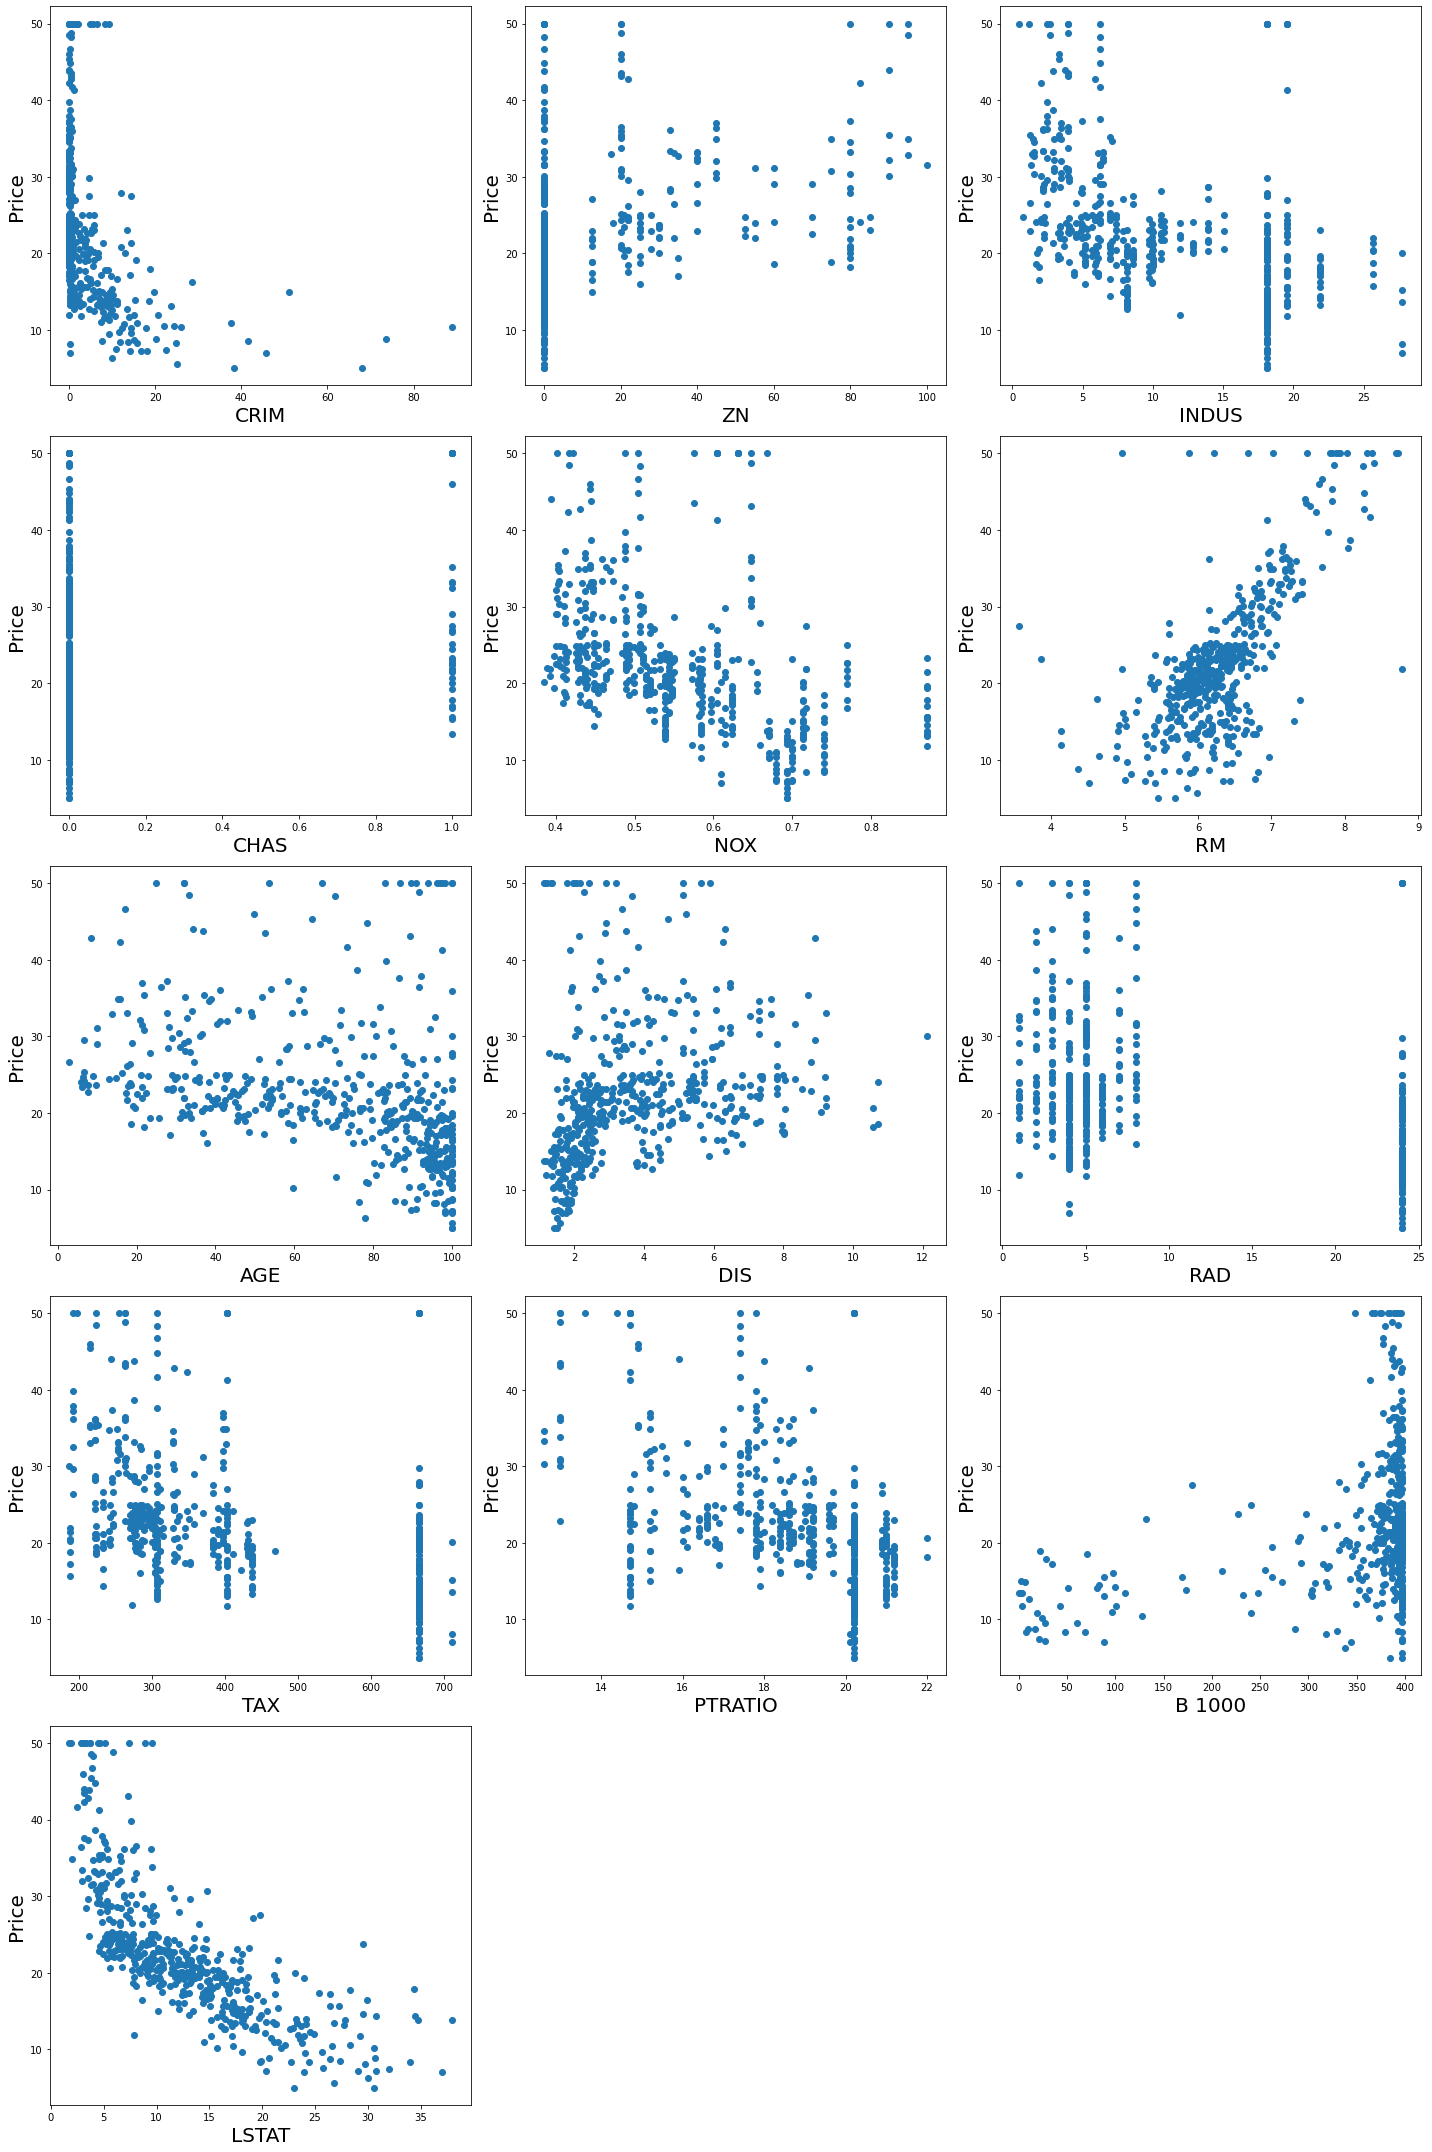

In [12]:
# visualizing the relationship between the features and the target
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(bos[column],price)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

Splitting our data into train and test

In [14]:
x_train,x_test,y_train,y_test = train_test_split(scaler.fit_transform(bos[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "PTRATIO", "B 1000", "LSTAT"]]),price,test_size = 0.25,random_state=355)

### Model Training and Prediction

Let's try Plain Linear Regression using our chosen predictors

In [15]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [16]:
regression.score(x_train,y_train)

0.7263352878677987

In [17]:
adj_r2(x_train,y_train)

0.7173626743552675

In [18]:
regression.score(x_test,y_test)

0.7431889797578299

In [19]:
adj_r2(x_test,y_test)

0.71615624078497

There's a minor penalization for usage of many features which can be seen in the r2 score of 74.31% and adjusted r2 score of 71.61%.
Now let's try training our model with regularization added to see if our model is overfitting our training data.

In [20]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [21]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [22]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.00033837642965584014)

In [23]:
lasso_reg.score(x_test, y_test)

0.7431932991051251

In [24]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.30051694, 2.8668354 , 0.66408276, 7.03856952, 2.21983018,
       3.62651746, 4.67587207, 8.96907053, 7.29519343, 6.56938979,
       0.09831872, 2.47621629, 4.04182093, 2.17188026, 0.86571076,
       5.05711482, 2.74506159, 5.2094536 , 5.06766974, 4.31523766,
       1.29762092, 8.70092035, 6.42731226, 1.3795927 , 9.39935278,
       8.75913492, 2.37194776, 4.12850163, 9.9947167 , 5.29324306,
       1.37041298, 3.12134236, 2.70313304, 1.04219016, 5.52359952,
       9.57603581, 0.66263529, 3.55089678, 6.32356291, 2.18060658,
       0.48910482, 8.7790667 , 8.64703511, 6.39243417, 4.32945897,
       4.92596628, 2.31512503, 9.99356937, 8.07913268, 7.08527133]),
        cv=10, normalize=True)

In [25]:
ridgecv.alpha_

0.09831872175957046

In [26]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09831872175957046)

In [27]:
ridge_model.score(x_test, y_test)

0.7431628604213302

In [28]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [29]:
elasticCV.alpha_

# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

elasticnet_reg.score(x_test, y_test)

0.7408474658151305

As we are getting the same r2 score using various types of regularization, it is safe to say that there is no overfitting and our data is trained well.